# Predict in-game Rank Tetr.io
---
**Por: Ian Joab Padron Corona - A01708940**

<a href="https://colab.research.google.com/github/Ian326/TC3002B/blob/main/Code/TetrisRankPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Librerias

In [ ]:
'''
===============================================================================
Librerias de Python a utilizar en el proyecto
===============================================================================
pandas: Libreria de manipulacion de datos en DataFrames
numpy: Libreria para operaciones matematicas y manipulacion de arreglos
seaborn: Libreria para visualizacion de datos
matplotlib: Libreria para graficar
tensorflow: Libreria de aprendizaje profundo
keras: API de alto nivel para crear redes neuronales
Sequential: API para crear modelos de redes neuronales
Dense: Capa densa (fully connected)
OneHotEncoder: Convertir variables categoricas en numericas creando columnas binarias. ESTE SOLO PARA EL DE TETRIS
MinMaxScaler: Normaliza los datos entre 0 y 1
train_test_split: Divide los datos en conjuntos de entrenamiento y prueba
classification_report: Genera un informe de clasificacion
confusion_matrix: Crea una matriz de confusiones
===============================================================================
'''

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Datos

In [2]:
data = pd.read_csv('../content/tl-data-09-2023.csv', low_memory=False)
# Eliminar columnas innecesarias
data.drop(columns=['id', 'username', 'country', 'bestrank', '40l_sprint', 'blitz'], inplace=True)

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45197 entries, 0 to 45196
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gamesplayed  45197 non-null  int64  
 1   gameswon     45197 non-null  int64  
 2   tr           45197 non-null  float64
 3   glicko       45197 non-null  float64
 4   rd           45197 non-null  float64
 5   rank         45197 non-null  object 
 6   apm          45197 non-null  float64
 7   pps          45197 non-null  float64
 8   vs           45197 non-null  float64
 9   verified     45197 non-null  bool   
dtypes: bool(1), float64(6), int64(2), object(1)
memory usage: 3.1+ MB
None


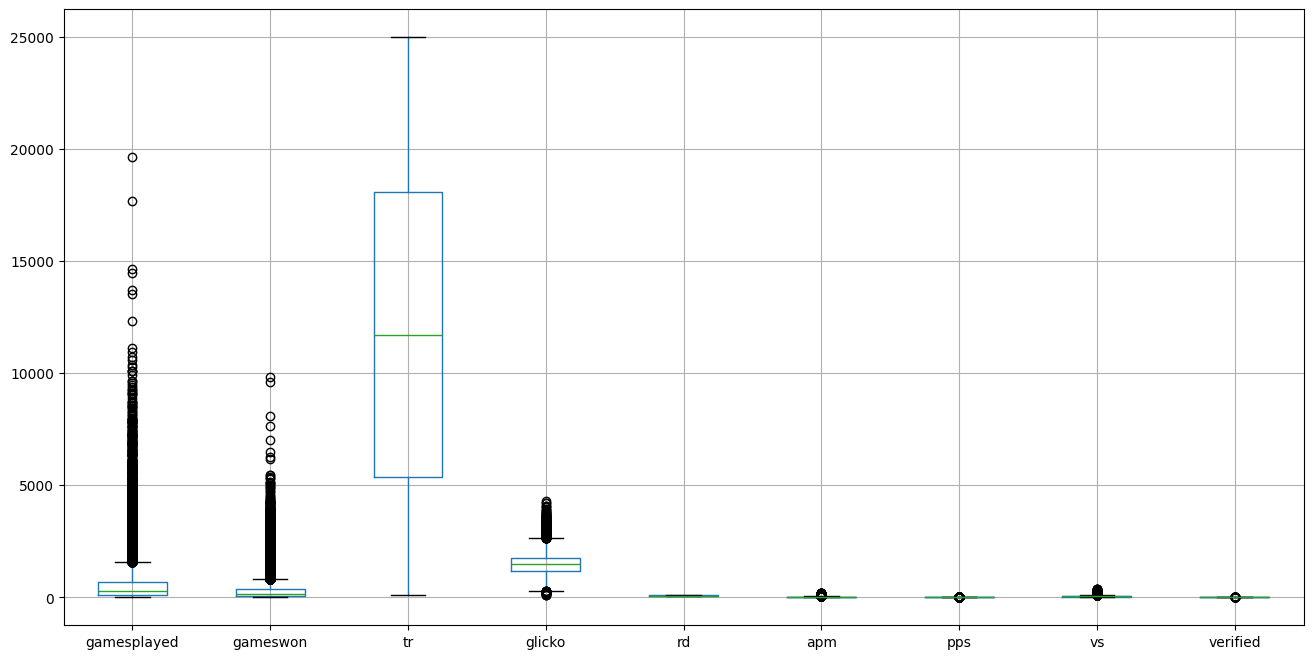

In [4]:
data.boxplot(figsize = (16, 8))
plt.show()

## Escalamiento

In [5]:
scaler = MinMaxScaler()

# Escalamiento de las columnas con valores muy grandes
data_scaled = data.copy()
rank_column = data_scaled['rank']
data_scaled.drop(columns=['rank'], inplace=True)
data_scaled = pd.DataFrame(scaler.fit_transform(data_scaled), columns=data_scaled.columns)
data_scaled['rank'] = rank_column

del rank_column

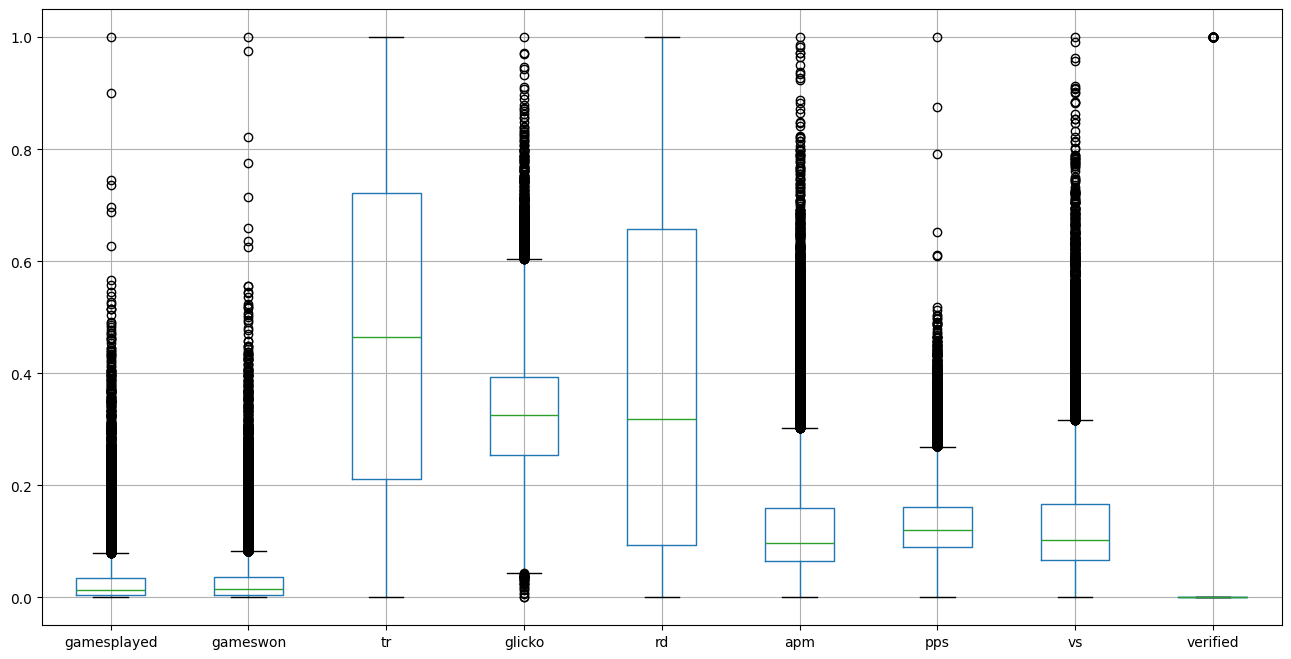

In [6]:
data_scaled.boxplot(figsize = (16, 8))
plt.show()

### OneHotEncoder

In [7]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply OneHotEncoder to the 'rank' column
rank_encoded = encoder.fit_transform(data[['rank']])

# Convert the encoded result to a DataFrame
rank_encoded_df = pd.DataFrame(rank_encoded, columns=encoder.get_feature_names_out(['rank']))

rank_columns = rank_encoded_df.columns.tolist()

# Concatenate the encoded 'rank' column back to the original DataFrame
data_scaled = pd.concat([data_scaled, rank_encoded_df], axis=1)

# Drop the original 'rank' column
data_scaled = data_scaled.drop(columns=['rank'])

## Separacion

In [8]:
# Asignar las 'features; X' y la 'target variable; y'
X = data_scaled.drop(columns=rank_columns)
y = data_scaled[rank_columns]

# Dividir los datos en en train y test
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    train_size   = 0.80,
                                                    random_state = 42,
                                                    shuffle      = True
                                                    )

## Modelo

### Classifier

In [9]:
def model_simple(shape):
    """
    This is a simple model multilayer perceptron or neural network.
    Your function should return the model.
    """
    model  =  Sequential([
                    Dense(96, activation='relu', input_shape=shape),
                    Dense(96, activation='relu'),
                    Dense(17, activation='softmax')
            ])
    return model

In [10]:
def compile_model_simple(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with default settings), the cross-entropy loss function and
    accuracy as the only metric.
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    model.compile(optimizer= "adam",
                  loss = "categorical_crossentropy",
                  metrics=['accuracy'])

In [11]:
def train_model_simple(model, train_features, train_labels):
    """
    Train the model on the scaled_train_images and train_labels.
    Your function should return the training history, as returned by model.fit.
    """
    return model.fit(
                        x=train_features, 
                        y=train_labels, 
                        validation_data=(X_test, y_test),
                        epochs = 20)

In [12]:
model_nn = model_simple(X_train.shape[1:])
model_nn.summary()

/home/user326/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1745447249.730244   24672 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 96)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 96)             │         9,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 17)             │         1,649 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,921 (46.57 KB)

 Trainable params: 11,921 (46.57 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
compile_model_simple(model_nn)

In [14]:
history_nn = train_model_simple(model_nn, X_train, y_train)

Epoch 1/20


I0000 00:00:1745447251.235079   24792 service.cc:152] XLA service 0x7f224801bee0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745447251.235121   24792 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-04-23 16:27:31.255993: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745447251.430869   24792 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-23 16:27:32.402911: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_161', 8 bytes spill stores, 8 bytes spill loads

2025-04-23 16:27:33.615840: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_d

  48/1130 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0989 - loss: 2.7957

I0000 00:00:1745447254.601665   24792 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1111/1130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4028 - loss: 1.8238

2025-04-23 16:27:39.135782: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_161', 36 bytes spill stores, 36 bytes spill loads

2025-04-23 16:27:39.339544: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_161', 12 bytes spill stores, 12 bytes spill loads

2025-04-23 16:27:39.939940: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_311', 72 bytes spill stores, 72 bytes spill loads



1130/1130 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4064 - loss: 1.8133 - val_accuracy: 0.7886 - val_loss: 0.6105
Epoch 2/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8413 - loss: 0.5152 - val_accuracy: 0.9093 - val_loss: 0.3333
Epoch 3/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9014 - loss: 0.3183 - val_accuracy: 0.8876 - val_loss: 0.2888
Epoch 4/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9191 - loss: 0.2429 - val_accuracy: 0.9258 - val_loss: 0.2143
Epoch 5/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9312 - loss: 0.2042 - val_accuracy: 0.9206 - val_loss: 0.2008
Epoch 6/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9327 - loss: 0.1842 - val_accuracy: 0.9344 - val_loss: 0.1771
Epoch 7/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9367 - loss: 0.1688 - val_accuracy: 0.9285 - val_loss: 0.1936
Epoch 8/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9384 - loss: 0.1628 - val_accura

### Plot accuracy

In [15]:
frame_trainingAcc = pd.DataFrame(history_nn.history['accuracy'])
frame_testingAcc = pd.DataFrame(history_nn.history['val_accuracy'])
frame_trainingLoss = pd.DataFrame(history_nn.history['loss'])
frame_testingLoss = pd.DataFrame(history_nn.history['val_loss'])

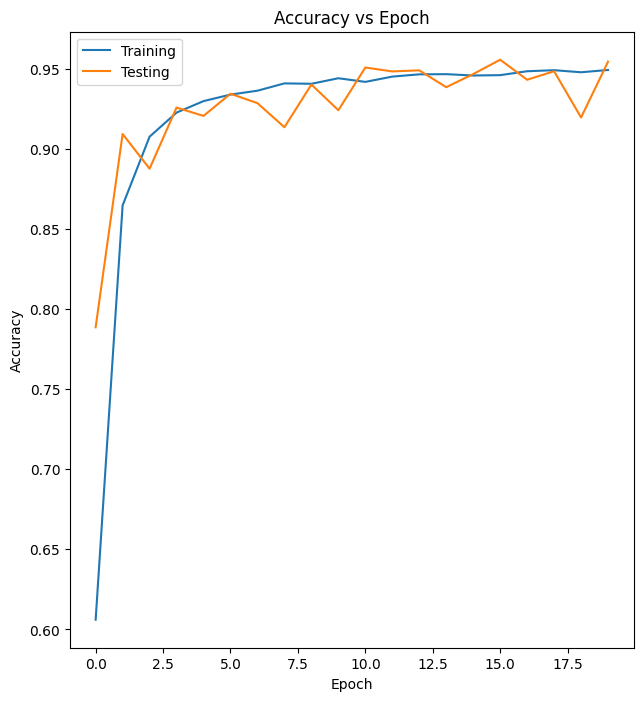

In [16]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.plot(frame_trainingAcc, label='Training')
plt.plot(frame_testingAcc, label='Testing')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

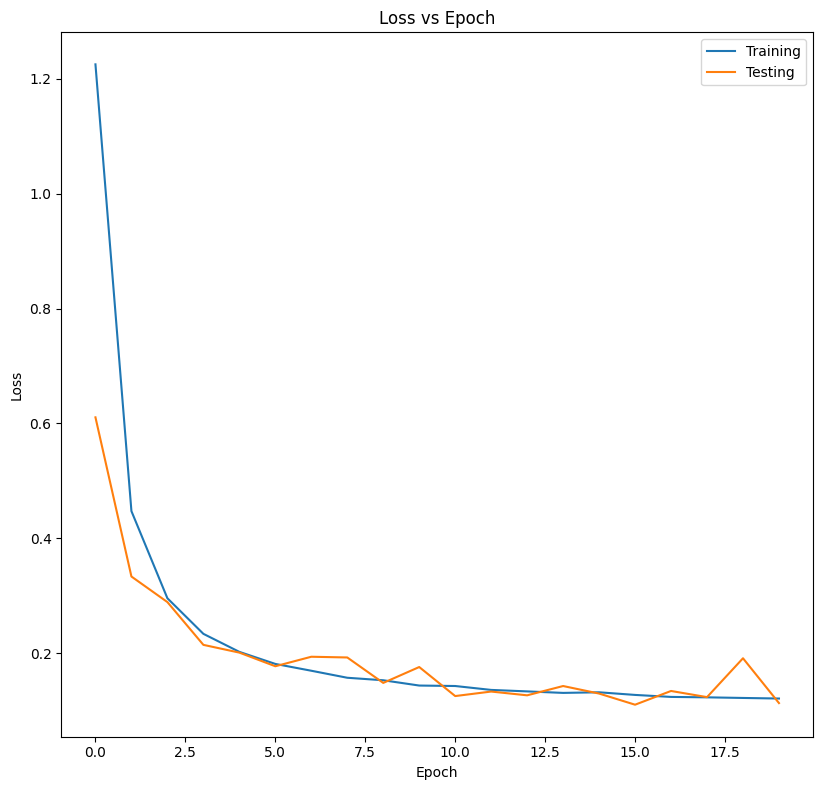

In [17]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 2)
plt.plot(frame_trainingLoss, label='Training')
plt.plot(frame_testingLoss, label='Testing')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Evaluacion

In [18]:
def evaluate_model(model, test_features, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels.
    Your function should return a tuple (test_loss, test_accuracy).
    """
    test_loss, test_accuracy = model.evaluate(test_features, test_labels)
    return (test_loss, test_accuracy)

In [19]:
test_loss, test_accuracy = evaluate_model(model_nn, X_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9538 - loss: 0.1123
Test loss: 0.1130
Test accuracy: 0.9544


In [20]:
# Predicciones y métricas
preds = model_nn.predict(X_test)
y_pred = np.argmax(preds, axis=1)
y_true = np.argmax(y_test.values, axis=1)
class_labels = list(y_test.columns)

print("\n Reporte de clasificación:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

 Reporte de clasificación:

              precision    recall  f1-score   support

      rank_a       0.96      0.98      0.97       694
     rank_a+       0.97      0.98      0.98       706
     rank_a-       0.97      0.95      0.96       762
      rank_b       0.97      0.97      0.97       729
     rank_b+       0.95      0.99      0.97       708
     rank_b-       0.96      0.97      0.96       699
      rank_c       0.96      0.96      0.96       564
     rank_c+       0.95      0.96      0.95       542
     rank_c-       0.92      0.96      0.94       477
      rank_d       1.00      0.89      0.94       237
     rank_d+       0.89      0.82      0.85       238
      rank_s       0.98      0.95      0.96       507
     rank_s+       0.97      0.97      0.97       564
     rank_s-       0.98      0.97      0.97       601
     rank_ss       0.98      0.90      0.94       543
      rank_u       0.87      0.92      0.89       372
      rank_

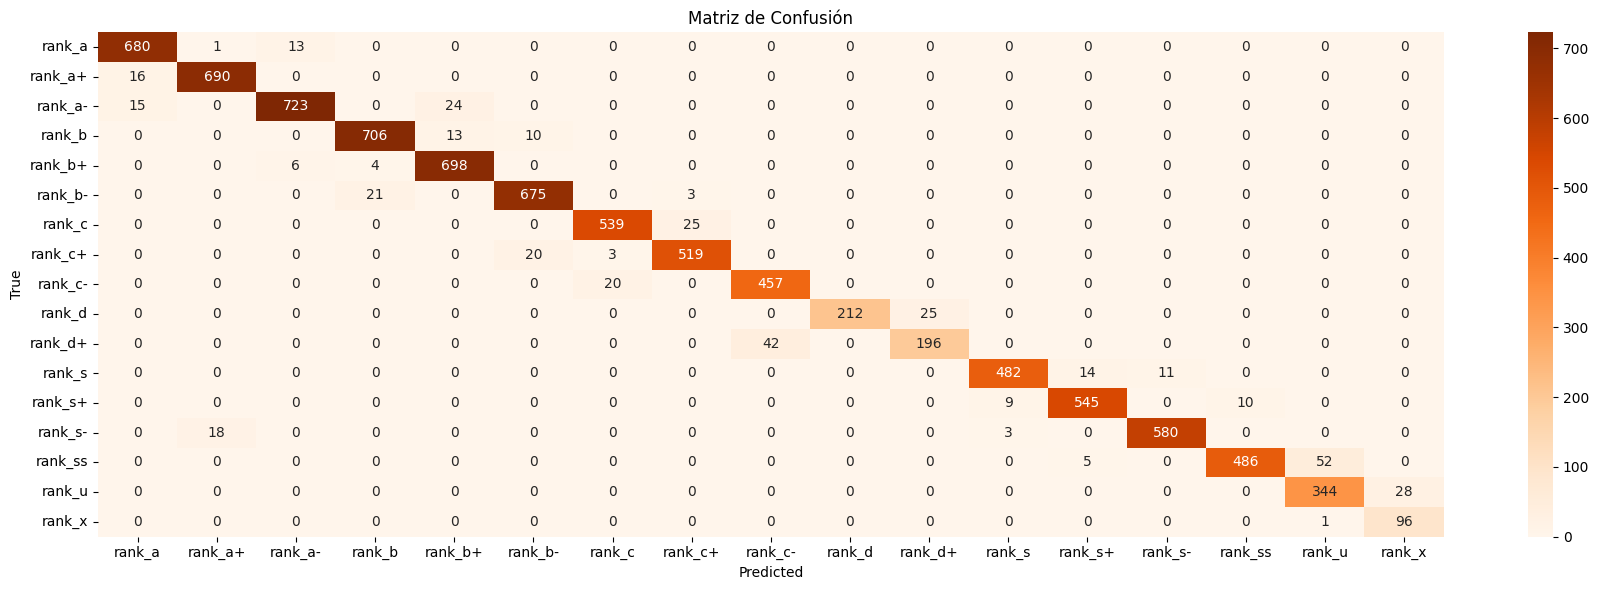

In [21]:
# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(18, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

# Testing on particular cases

In [22]:
import requests

In [23]:
def cleanAPIResponse(df) -> pd.DataFrame:
    # Drop unnecessary columns
    df.drop(columns=['gxe', 'decaying', 'standing', 'percentile', 'standing_local', 'prev_at', 
                     'next_rank', 'next_at', 'percentile_rank'], inplace=True)
    return df

In [24]:
def searchUser(username):
    url = f"https://ch.tetr.io/api/users/{username}/summaries/league"
    response = requests.get(url)
    print(response)
    if response.status_code == 200:
        response_data = response.json()
        if 'data' in response_data:
            user_data = data['data']
            user_data.pop("past", None)
            response_df = pd.DataFrame(user_data)
            return cleanAPIResponse(response_df)
        else:
            print("Failed to retrieve user data.")
    else:
        print("Failed to process the FETCH request.", response.status_code)

In [25]:
def prepareUserData(df) -> pd.DataFrame:
    
    # Reorddenamiento de las columnas
    reorder_columns = ['gamesplayed', 'gameswon', 'tr', 'glicko', 'rd', 'rank', 'apm', 'pps', 
                       'vs', 'verified']
    df = df[reorder_columns]

    # Escalamiento de las columnas con valores muy grandes
    user_data_scaled = df.copy()

    # Drop target variable
    user_rank = user_data_scaled['rank']
    user_data_scaled.drop(columns=['rank'], inplace=True)

    # Scale the data
    user_data_scaled = pd.DataFrame(scaler.transform(user_data_scaled), columns=user_data_scaled.columns)
    user_data_scaled['rank'] = user_rank

    # rank_encoded = encoder.transform(user_rank.values.reshape(-1, 1))
    # rank_encoded_df = pd.DataFrame(rank_encoded, columns=encoder.get_feature_names_out(['rank']))
    
    # # Remove the prefix '_rank_' from the column names
    # rank_encoded_df.columns = rank_encoded_df.columns.str.replace('_rank_', '', regex=False)
    # # Concatenate the encoded rank columns back to the DataFrame
    # user_data_scaled = pd.concat([user_data_scaled, rank_encoded_df], axis=1)

    return user_data_scaled

In [ ]:
userName = 'turtle'
# user_data = searchUser(userName)
user_data = {
    "gamesplayed": 588,
    "gameswon": 448,
    "glicko": 3879.45267709728,
    "rd": 88.1805164177281,
    "tr": 24536.0079085065,
    "rank": "x",
    "apm": 180.79,
    "pps": 3.2,
    "vs": 357.38,
    "verified": True
}

user_data = pd.DataFrame(user_data, index=[0])

if user_data is not None:
        
    user_data = prepareUserData(user_data)

    # Save and drop the target variable
    user_rank = user_data['rank']
    user_data.drop(columns=['rank'], inplace=True)

    # Predict the rank using the trained model
    prediction = model_nn.predict(user_data)
    
    # Decode the prediction (get the class with the highest probability)
    predicted_class = np.argmax(prediction, axis=1)
    
    # Map the predicted class index to the rank label
    predicted_rank = rank_columns[predicted_class[0]]
    
    # Print the predicted rank
    print(f"The predicted rank for user '{userName}' is: {predicted_rank}")
    print(f"The factual rank for user '{userName}' is: rank_{user_rank.values[0]}")
else:
    print(f"Failed to retrieve data for user {userName}.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
The predicted rank for user 'turtle' is: rank_x
The factual rank for user 'turtle' is: x
